# Importing The Required Libaries

In [86]:
#Importing the Required Libraries
import pandas as pd #For data Manipulation/Analysis
import numpy as np # For Linear Algebra
from sklearn import preprocessing, model_selection#For modeling
from sklearn.svm import SVC
#Importing Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
#from mlxtend.plotting import plot_decisions_regions
%matplotlib inline

# Reading/Importing the Dataset and Data Preprocessing

In [87]:
#Reading/Importing the Dataset
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data')
data.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [88]:
#Changing the name of the columns
cols = ['Id number', 'Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion',
           'Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']
data.columns = cols
data.head()

,Id number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [89]:
data.describe()

,Id number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.980000e+02,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,1.071807e+06,4.416905,3.137536,3.210602,2.809456,3.217765,3.438395,2.869628,1.590258,2.690544
std,6.175323e+05,2.817673,3.052575,2.972867,2.856606,2.215408,2.440056,3.055004,1.716162,0.951596
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.702582e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238354e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [90]:
#Checking for the size of the data
data.shape

(698, 11)

In [91]:
#Checking for missing entries
data.isnull().sum()

Id number                      0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [92]:
data.head()

,Id number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [93]:
#Dropping the Id column
data.drop('Id number', inplace=True, axis=1)
data.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,4,4,5,7,10,3,2,1,2
1,3,1,1,1,2,2,3,1,1,2
2,6,8,8,1,3,4,3,7,1,2
3,4,1,1,3,2,1,3,1,1,2
4,8,10,10,8,7,10,9,7,1,4


In [94]:
#Checking for unique column entries
data['Clump Thickness'].unique()

array([ 5,  3,  6,  4,  8,  1,  2,  7, 10,  9], dtype=int64)

In [95]:
#Using a loop to iterate through columns
for col in data:
    print(col)
    print(data[col].unique())

Clump Thickness
[ 5  3  6  4  8  1  2  7 10  9]
Uniformity of Cell Size
[ 4  1  8 10  2  3  7  5  6  9]
Uniformity of Cell Shape
[ 4  1  8 10  2  3  5  6  7  9]
Marginal Adhesion
[ 5  1  3  8 10  4  6  2  9  7]
Single Epithelial Cell Size
[ 7  2  3  1  6  4  5  8 10  9]
Bare Nuclei
['10' '2' '4' '1' '3' '9' '7' '?' '5' '8' '6']
Bland Chromatin
[ 3  9  1  2  4  5  7  8  6 10]
Normal Nucleoli
[ 2  1  7  4  5  3 10  6  9  8]
Mitoses
[ 1  5  4  2  3  7 10  8  6]
Class
[2 4]


In [96]:
#checking for data types
data.dtypes

Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [97]:
#fixing wrong data entry
data['Bare Nuclei'].replace({'?':-999}, inplace=True)
data['Bare Nuclei'].unique()

array(['10', '2', '4', '1', '3', '9', '7', -999, '5', '8', '6'],
      dtype=object)

In [98]:
#Changing data type
data['Bare Nuclei'] = data['Bare Nuclei'].astype(int)
data.dtypes

Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int32
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

In [99]:
data.corr()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Clump Thickness,1.000000,0.645366,0.655089,0.486699,0.522108,0.070762,0.558511,0.536176,0.350176,0.716509
Uniformity of Cell Size,0.645366,1.000000,0.906814,0.705397,0.751674,0.051612,0.755824,0.722699,0.458548,0.817772
Uniformity of Cell Shape,0.655089,0.906814,1.000000,0.682871,0.719524,0.034317,0.736066,0.719272,0.438756,0.818794
Marginal Adhesion,0.486699,0.705397,0.682871,1.000000,0.599402,0.069428,0.666759,0.603132,0.417476,0.696605
Single Epithelial Cell Size,0.522108,0.751674,0.719524,0.599402,1.000000,0.067908,0.616108,0.628704,0.478975,0.682618
Bare Nuclei,0.070762,0.051612,0.034317,0.069428,0.067908,1.000000,0.035898,0.019845,0.060825,0.090514
Bland Chromatin,0.558511,0.755824,0.736066,0.666759,0.616108,0.035898,1.000000,0.665914,0.344118,0.756732
Normal Nucleoli,0.536176,0.722699,0.719272,0.603132,0.628704,0.019845,0.665914,1.000000,0.428185,0.712067
Mitoses,0.350176,0.458548,0.438756,0.417476,0.478975,0.060825,0.344118,0.428185,1.000000,0.423008
Class,0.716509,0.817772,0.818794,0.696605,0.682618,0.090514,0.756732,0.712067,0.423008,1.000000


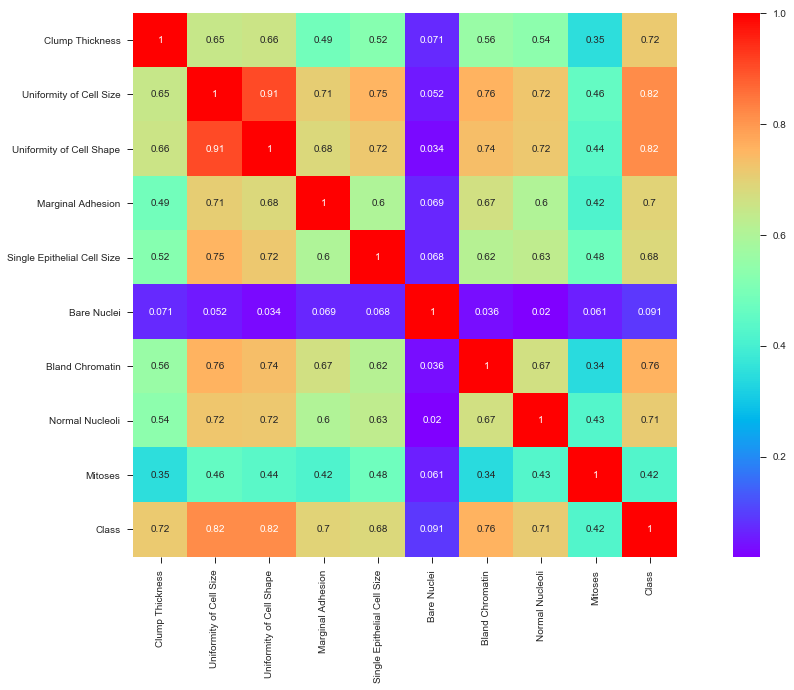

In [100]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, square=True,vmax=1,cmap='rainbow')

In [101]:
#Defining X and Y using Pandas
X = data.drop('Class', axis=1)
y = data.Class

#Defining X and Y using Numpy
X = np.array(data.drop(['Class'],1))
y = np.array(data['Class'])

Text(0,0.5,'Maglinant')

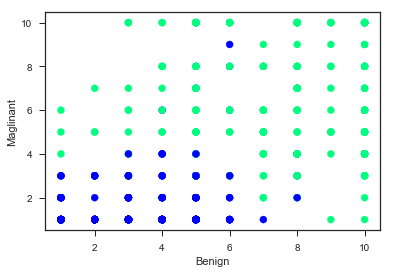

In [102]:
plt.figure(figsize=(6,4))
plt.scatter(X.iloc[:,0],X.iloc[:,1], c=y, s=50, cmap='winter')
plt.xlabel('Benign')
plt.ylabel('Maglinant')

# MODELING - SVM CLASSIFIER: Train, test, Evaluate

In [103]:
#Splitting the data into Train and test set
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size=0.2, random_state=42)
print(X.shape)
print(y.shape)

(698, 9)
(698,)


In [104]:
#Fitting the Classifier
#Using a Linear Kernel
clf_l = SVC(kernel='linear')
clf_l.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [105]:
clf_l.support_vectors_

array([[   3.,    1.,    1.,    1.,    2.,    2.,    7.,    1.,    1.],
       [   5.,    1.,    4.,    1.,    2.,    1.,    3.,    2.,    1.],
       [   8.,    4.,    6.,    3.,    3.,    1.,    4.,    3.,    1.],
       [   2.,    2.,    2.,    1.,    1.,    1.,    7.,    1.,    1.],
       [   4.,    6.,    5.,    6.,    7., -999.,    4.,    9.,    1.],
       [   5.,    4.,    4.,    5.,    7.,   10.,    3.,    2.,    1.],
       [   8.,    4.,    4.,    5.,    4.,    7.,    7.,    8.,    2.],
       [   5.,    2.,    2.,    2.,    2.,    2.,    3.,    2.,    2.],
       [   5.,    3.,    6.,    1.,    2.,    1.,    1.,    1.,    1.],
       [   4.,    3.,    3.,    1.,    2.,    1.,    3.,    3.,    1.],
       [   8.,    3.,    3.,    1.,    2.,    2.,    3.,    2.,    1.],
       [   6.,    2.,    1.,    1.,    1.,    1.,    7.,    1.,    1.],
       [   5.,    1.,    2.,   10.,    4.,    5.,    2.,    1.,    1.],
       [   3.,    3.,    2.,    6.,    3.,    3.,    3.,    5., 

In [106]:
#prediction
pred_l = clf_l.predict(X_test)
accuracy = clf_l.score(X_test,y_test)
print(accuracy)

0.9642857142857143


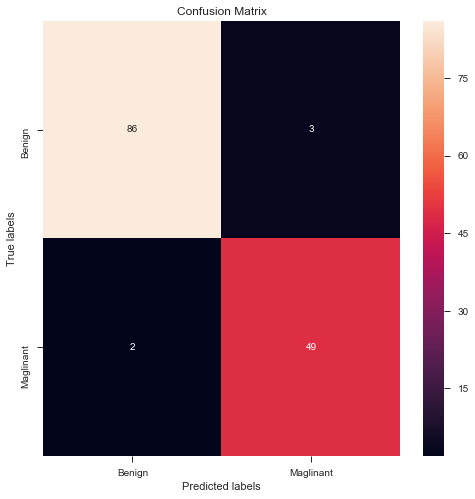

In [107]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred_l)
plt.figure(figsize=(8,8))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax=ax)
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Benign', 'Maglinant']); ax.yaxis.set_ticklabels(['Benign', 'Maglinant']);

In [108]:
clf_r = SVC(kernel='rbf', gamma='scale')
clf_r.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [109]:
pred_r = clf_r.predict(X_test)
accuracy = clf_r.score(X_test,y_test)
print(accuracy)

0.9857142857142858


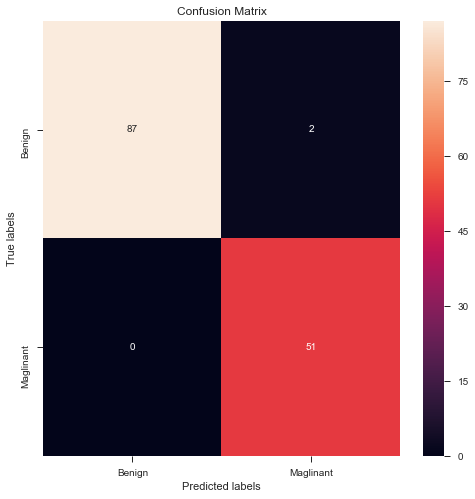

In [110]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred_r)
plt.figure(figsize=(8,8))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax=ax)
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Benign', 'Maglinant']); ax.yaxis.set_ticklabels(['Benign', 'Maglinant']);

In [111]:
clf_p = SVC(kernel='poly', degree=4)
clf_p.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [112]:
pred_p = clf_p.predict(X_test)
accuracy = clf_p.score(X_test,y_test)
print(accuracy)

0.95


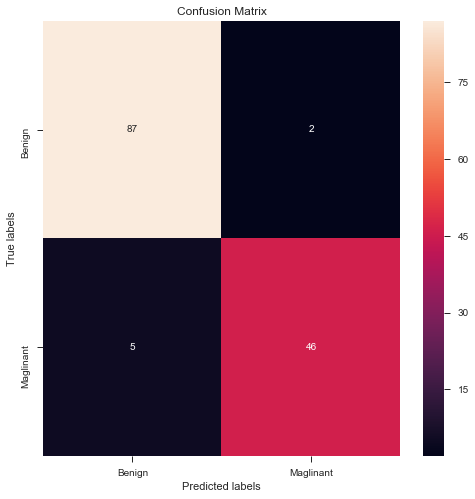

In [113]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred_p)
plt.figure(figsize=(8,8))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax=ax)
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Benign', 'Maglinant']); ax.yaxis.set_ticklabels(['Benign', 'Maglinant']);